(noiseandstoch)=
# Noise and stochastic model
In the previous section you have learned about the different components that can be present in a time series. Removing all these component, i.e. the functional model, we will be left with the residual term $\epsilon(t)$. In this section we will take a closer look at the differences between signal and noise, and introduce other types of noise than the traditional white noise.

## Additional concepts

In [Signal Processing](SP) the data is just considered to be the signal of interest, whereas here we assume the data is "contaminated" with noise, i.e.

$$Y = \text{signal} + \text{noise} $$

Time series analysis means understanding patterns and, hence, extracting the **signal of interest** from the noisy data.

### Signal and noise

How can we describe both signal and noise?

* **Signal** - the meaningful information that we want to detect: deterministic characteristics by means of mathematical expressions to capture for example trend, seasonality and offsets.

* **Noise** - random and undesired fluctuation that interferes with the signal: stochastic process are needed to describe this. Parts of the time-correlated noise  needs to be accounted for in prediction, see later {ref}`ARMA`. 

The example in {numref}`signal_noise` shows that the *signal* can be described by $\cos(2\pi t f + \phi)$, where frequency $f$ and phase $\phi$ may be the unknown parameters of interest. The stochastic model (assuming independent observations) would be a scaled identity matrix with variance equal to 1 (middle panel) and 3 (bottom panel), respectively. The signal of interest has been entirely hidden in the background noise in the bottom panel. {ref}`psd` can be used to detect the frequency.

```{figure} ./figs/signal_noise.png
:name: signal_noise
:width: 600px
:align: center

Example of a time series (top graph) affected by noise with different strengths (middle and bottom figures). Note the different scales on the vertical axes.
```

#### Signal to noise ratio
In signal processing the signal to noise ratio is commonly used to report on the amount of noise present in the model. If we analyze the model $Y = signal + noise$, then Y is a random variable with $E[Y] = E[signal] = \mu$, and its distribution $D(Y) = D(noise) = \sigma^2$. Using this the signal to noise ratio is often defined as:

$$ SNR = \frac{\mu}{\sigma}$$
or alternatively as:
$$ SNR = \frac{\mu^2}{\sigma^2}$$

## Different types of noise
In the ideal case when the signal is removed, you are left when white noise. A white noise stochastic model has the following properties:
$$
\mathbb{E}(Y) =  \mathbb{E} \left[\begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_m \end{array}\right] = \left[\begin{array}{c} 0 \\ 0 \\ \vdots \\ 0 \end{array}\right]
$$

and 

$$
\mathbb{D}(Y) =  \Sigma_{Y} = \sigma^2 \left[\begin{array}{ccc} 1 & 0 & \ldots{} & 0 \\ 0 & 1 & \ldots{} & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \ldots{} & 1 \end{array}\right]
$$
Most notably, all observations are uncorrelated (off-diagonal elements of the covariance matrix are equal to 0). When we compute the PSD, ## add ref to psd chapter## the resulting density will be flat over the entire range of frequencies. In other words, a white noise process has equal energy over all frequencies, just like white light.

### Colored noise
In time series however, it is not guarantied that the individual observations are uncorrelated.  

#ToDo add plot where you can choose different noise models

In [4]:
## create a white noise signal and plot it
import numpy as np  
import matplotlib.pyplot as plt
import ipywidgets as widgets

# create a white noise signal
np.random.seed(0)
N = 1000
x = np.random.randn(N)

# plot the signal
plt.figure(figsize=(12, 4))

# Function to generate pink noise
def pink_noise(N):
    uneven = N % 2
    X = np.random.randn(N//2+1+uneven) + 1j * np.random.randn(N//2+1+uneven)
    S = np.sqrt(np.arange(len(X)) + 1.)  # +1 to avoid divide by zero
    y = (np.fft.irfft(X/S)).real
    if uneven:
        y = y[:-1]
    return y

# Function to generate red (brown) noise
def red_noise(N):
    return np.cumsum(np.random.randn(N))

# Function to generate blue noise
def blue_noise(N):
    uneven = N % 2
    X = np.random.randn(N//2+1+uneven) + 1j * np.random.randn(N//2+1+uneven)
    S = np.sqrt(np.arange(len(X)))  # no +1 here
    y = (np.fft.irfft(X*S)).real
    if uneven:
        y = y[:-1]
    return y
# BEGIN: white_noise function
def white_noise(N):
    return np.random.randn(N)


# Generate different noise signals
pink = pink_noise(N)
red = red_noise(N)
blue = blue_noise(N)
x = white_noise(N)


<Figure size 1200x400 with 0 Axes>

Dropdown(description='Noise Type:', options=('Pink Noise', 'Red Noise', 'Blue Noise', 'White Noise'), value='P…

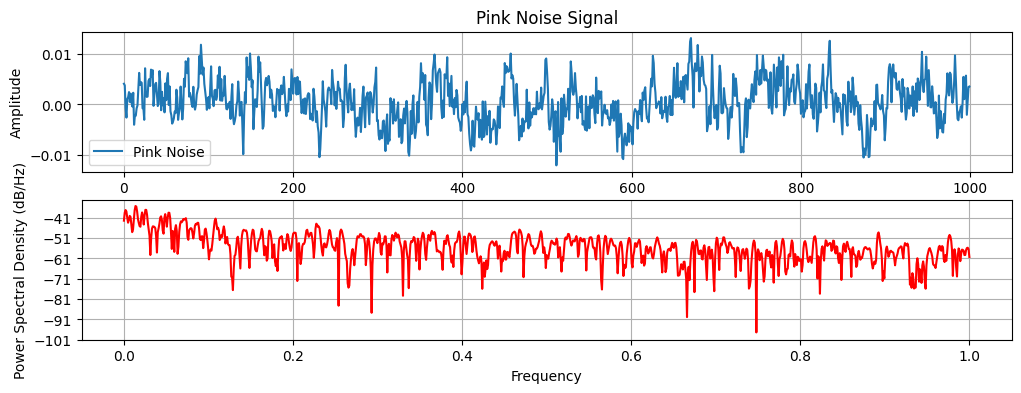

In [5]:
# Create a dropdown menu for noise types
dropdown = widgets.Dropdown(
    options=noise_options,
    value='Pink Noise',
    description='Noise Type:',
)

# Function to update the plot based on selected noise type
def update_plot_dropdown(change):
    noise_type = change['new']
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    
    if noise_type == 'Pink Noise':
        plt.plot(pink, label='Pink Noise')
    elif noise_type == 'Red Noise':
        plt.plot(red, label='Red Noise')
    elif noise_type == 'Blue Noise':
        plt.plot(blue, label='Blue Noise')
    elif noise_type == 'White Noise':
        plt.plot(x, label='White Noise')
    
    plt.title(f'{noise_type} Signal')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.psd(pink, NFFT=2048, Fs=2, color='r', label='Pink Noise')

# Link dropdown to the update function
dropdown.observe(update_plot_dropdown, names='value')

# Display dropdown
display(dropdown)

# Initial plot
update_plot_dropdown({'new': dropdown.value})